In [1]:
import os
import cv2
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# 경로 지정
print('현재 경로 : ',os.getcwd())

train_dir = './Train/'
val_dir = './Validation/'
test_dir = './Test/'


현재 경로 :  c:\Users\T\Desktop\Temp\5_Flower_Types_Classification_Generator


In [3]:
# ImageDataGenerator 객체 생성
train_data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 180,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.4,
    zoom_range = 0.4,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

val_data_gen = ImageDataGenerator(
    rescale = 1./255
)

test_data_gen = ImageDataGenerator(
    rescale = 1./255
)


In [4]:
# dir 순회하며 dir명에 맞게 라벨 생성하는 반복자 객체 생성
# 각각의 반복자 객체에는 dir의 이미지들이 랜덤순으로 들어감.
train_gen = train_data_gen.flow_from_directory(
    train_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

val_gen = val_data_gen.flow_from_directory(
    val_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

test_gen = test_data_gen.flow_from_directory(
    test_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)



Found 3825 images belonging to 5 classes.
Found 675 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


(array([[[[8.83766532e-01, 5.75296402e-01, 2.58778851e-03],
         [8.86380196e-01, 5.78563452e-01, 1.93437340e-03],
         [8.88993859e-01, 5.81830502e-01, 1.28095830e-03],
         ...,
         [6.57608509e-01, 5.78678489e-01, 2.00778991e-01],
         [6.77341223e-01, 5.85234344e-01, 1.84916809e-01],
         [6.97021425e-01, 6.01391554e-01, 1.86734319e-01]],

        [[8.93270791e-01, 5.87176681e-01, 2.11727805e-04],
         [8.95884454e-01, 5.90443790e-01, 4.41687298e-04],
         [8.98498118e-01, 5.93710840e-01, 1.09510240e-03],
         ...,
         [6.61749244e-01, 5.82287252e-01, 2.08076388e-01],
         [6.77380919e-01, 5.84956527e-01, 1.88186988e-01],
         [6.97361946e-01, 6.01448774e-01, 1.90337986e-01]],

        [[9.02775049e-01, 5.99056959e-01, 2.16433289e-03],
         [9.05388653e-01, 6.02324069e-01, 2.81774811e-03],
         [9.08002377e-01, 6.05591178e-01, 3.47116310e-03],
         ...,
         [6.65325344e-01, 5.84554613e-01, 2.20197275e-01],
         

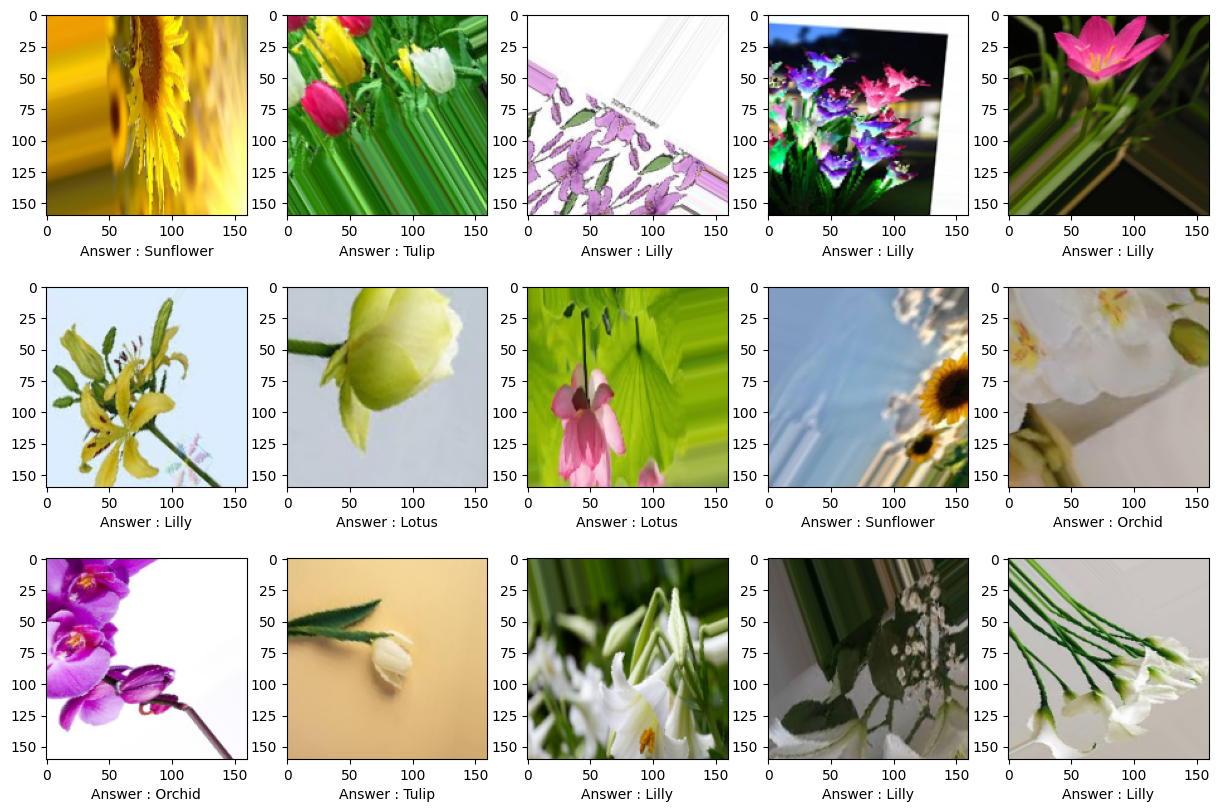

In [5]:
# train 이미지 확인
labels_dict = {0:'Lilly', 1:'Lotus', 2:'Orchid', 3:'Sunflower', 4:'Tulip'}

batch = next(train_gen)

print(batch)
print()

images, labels = batch

print(len(images))
print()
print(len(labels))
print()
print(labels)  # ImageDataGenerator로 전처리 하면 자동으로 원-핫 인코딩으로 준비 됨.
# 따라서 신경망 모델 컴파일 시 loss = 'categorical_crossentropy'로 해야 함.


# train data idx 번째 이미지를 시각화
plt.figure(figsize=(15,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i])
    plt.xlabel(f"Answer : {labels_dict[np.argmax(labels[i])]}")
    #plt.title(f"Label: {labels[0]}")
plt.show()


In [6]:
# 신경망 모델 구성
model = keras.Sequential()

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same', input_shape=(160, 160, 3)))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(80, 80, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(40, 40, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(20, 20, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(10, 10, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(5, 5, 128)

model.add(keras.layers.Flatten())   # 밀집층에 입력시키기 위해 3차원을 1차원으로 변환.

model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

#model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.
 
model.add(keras.layers.Dense(5, activation='softmax'))

# 신경망 모델 구조
model.summary()
 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 80, 80, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 40, 40, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

In [7]:
# 신경망 모델 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('T3_N11-2_size160_conv5-128_den2-200_epo200_val15.h5', save_best_only=True)

#early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [8]:
# 신경망 모델 훈련
history = model.fit(train_gen, epochs=200, validation_data=val_gen, verbose=1, callbacks=[checkpoint_cb])


Epoch 1/200
120/120 [==============================] - 503s 4s/step - loss: 1.4286 - accuracy: 0.3380 - val_loss: 1.2436 - val_accuracy: 0.4148
Epoch 2/200


C:\Users\T\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


120/120 [==============================] - 491s 4s/step - loss: 1.3124 - accuracy: 0.4201 - val_loss: 1.2107 - val_accuracy: 0.4504
Epoch 3/200
120/120 [==============================] - 460s 4s/step - loss: 1.2297 - accuracy: 0.4894 - val_loss: 1.2191 - val_accuracy: 0.4948
Epoch 4/200
120/120 [==============================] - 462s 4s/step - loss: 1.1659 - accuracy: 0.5315 - val_loss: 1.0732 - val_accuracy: 0.5585
Epoch 5/200
120/120 [==============================] - 467s 4s/step - loss: 1.1202 - accuracy: 0.5535 - val_loss: 1.0718 - val_accuracy: 0.5630
Epoch 6/200
120/120 [==============================] - 456s 4s/step - loss: 1.1509 - accuracy: 0.5480 - val_loss: 1.0424 - val_accuracy: 0.5659
Epoch 7/200
120/120 [==============================] - 456s 4s/step - loss: 1.0830 - accuracy: 0.5671 - val_loss: 1.0121 - val_accuracy: 0.5793
Epoch 8/200
120/120 [==============================] - 456s 4s/step - loss: 1.0950 - accuracy: 0.5610 - val_loss: 0.9871 - val_accuracy: 0.5926
Epoc

In [9]:
# history의 key값 알아보기
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


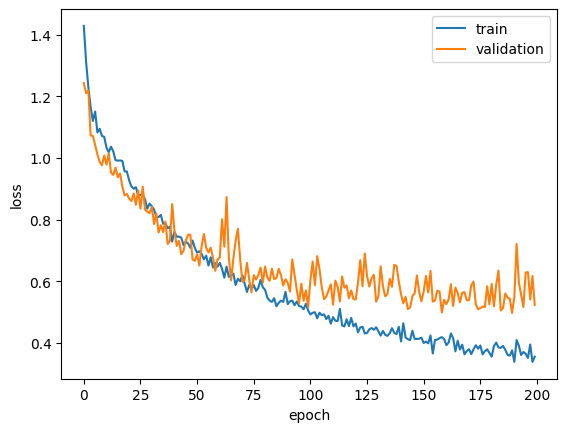

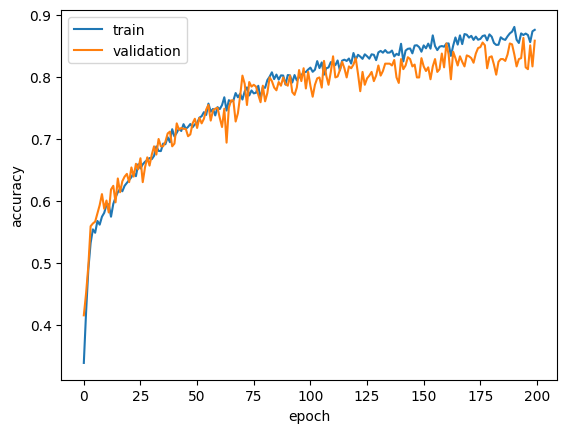

In [10]:
# 훈련 과정 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [11]:
# test 평가
model.evaluate(test_gen)

16/16 [==============================] - 17s 1s/step - loss: 0.5341 - accuracy: 0.8660


[0.534076452255249, 0.8659999966621399]

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
[0. 0. 1. 0. 0.]
32
1/1 [==============================] - 1s 1s/step
[[4.27227989e-02 4.16454002e-02 7.34927654e-01 1.43763580e-04
  1.80560395e-01]
 [2.26588490e-05 9.99837399e-01 2.57849729e-06 3.23316068e-10
  1.37276278e-04]
 [9.99549925e-01 1.07908154e-05 1.21253311e-06 1.36724887e-09
  4.37968265e-04]
 [2.14245732e-26 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [9.76530492e-01 1.53175686e-04 1

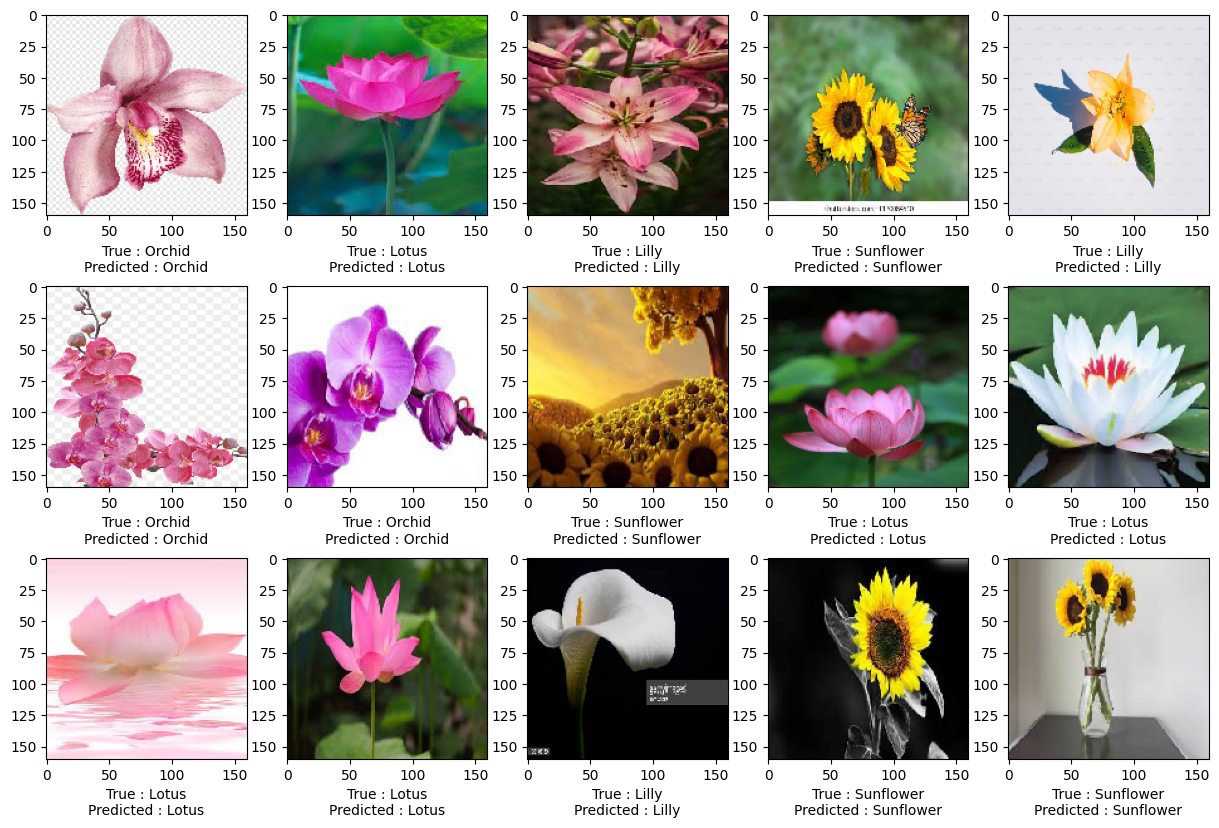

In [12]:
# test 평가 시각화
test_images, test_labels = next(test_gen)  

print(test_labels)
print(test_labels[0])
print(len(test_labels))

pred = model.predict(test_images)

print(pred)
print(pred[0])
print(len(pred))

plt.figure(figsize=(15, 10))
for i in range(15):  
    plt.subplot(3, 5, i+1)
    plt.imshow(test_images[i])
    true_label = labels_dict[np.argmax(test_labels[i])]  
    predicted_label = labels_dict[np.argmax(pred[i])]  
    plt.xlabel(f'True : {true_label}\nPredicted : {predicted_label}')

plt.show()